# Social Analytics Sentiments Api

* Observed trend 1: On September 9, 2018, overall sentiment polarity is positive for BBC and CBS tweets and negative for Fox News and CNN. For NY Times, the tweet sentiment is almost neutral.

* Observed trend 2: From the overall media sentiment based on tweets, CBS is most positive at 14% and BBC is the second most positive with 13%. NY Times has -0.25% which is in the neutral zone.

* Observed trend 3: The results also show that FOX is most negative with -0.41 % negative polarity and CNN being second with -2% negative ploarity.

In [33]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
from datetime import datetime

# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "Ed4RNulN1lp7AbOooHa9STCoU"
consumer_secret = "P7cUJlmJZq0VaCY0Jg7COliwQqzK0qYEyUF9Y0idx4ujb3ZlW5"
access_token = "839621358724198402-dzdOsx2WWHrSuBwyNUiqSEnTivHozAZ"
access_token_secret = "dCZ80uNRbFDjxdU2EckmNiSckdoATach6Q8zb7YYYE5ER"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Getting Sentiment Data From Media Tweets

In [34]:
# Target Search Term# Target 
target_terms = ("BBC", "CBS", "CNN",
                "FoxNews", "nytimes")

In [35]:
# Array to hold sentiment
sentiments_all = []
# Counter
counter = 1

In [36]:
# Loop through all target users
for target in target_terms:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(target, page=x)
        # Loop through all tweets 
        for tweet in public_tweets:
        
            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter
            
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)


            # Add sentiments for each tweet into an array
            sentiments_all.append({"User": target, 
                           "Source account": tweet["source"],
                           "Date": tweet["created_at"],        
                           "Text": tweet["text"],
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
            
            
            # Add to counter 
            counter = counter + 1
    
    

print(sentiments_all)
print("")

[{'User': 'BBC', 'Source account': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>', 'Date': 'Sun Sep 09 20:06:03 +0000 2018', 'Text': "This is what it's like to live through a school shooting.\n(via @BBCThree) https://t.co/itHFZzKHga", 'Compound': 0.3612, 'Positive': 0.172, 'Negative': 0.828, 'Neutral': 0.0, 'Tweets Ago': 1}, {'User': 'BBC', 'Source account': '<a href="https://studio.twitter.com" rel="nofollow">Media Studio</a>', 'Date': 'Sun Sep 09 18:05:00 +0000 2018', 'Text': "This family *might* own an abstract sculpture worth hundreds of thousands... if it weren't for the cat knocking it… https://t.co/yg9TVb27rs", 'Compound': 0.2263, 'Positive': 0.091, 'Negative': 0.909, 'Neutral': 0.0, 'Tweets Ago': 2}, {'User': 'BBC', 'Source account': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>', 'Date': 'Sun Sep 09 17:03:05 +0000 2018', 'Text': "Next time you're passing a goat - remember to smile! 😊https://t.co/TgdjINT4BS", 'Compound': 0.4199, 'Positi

# Creating a Data Frame From Sentiments

In [37]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments_all)
sentiments_pd

,Compound,Date,Negative,Neutral,Positive,Source account,Text,Tweets Ago,User
0,0.3612,Sun Sep 09 20:06:03 +0000 2018,0.828,0.000,0.172,"<a href=""http://www.socialflow.com"" rel=""nofol...",This is what it's like to live through a schoo...,1,BBC
1,0.2263,Sun Sep 09 18:05:00 +0000 2018,0.909,0.000,0.091,"<a href=""https://studio.twitter.com"" rel=""nofo...",This family *might* own an abstract sculpture ...,2,BBC
2,0.4199,Sun Sep 09 17:03:05 +0000 2018,0.741,0.000,0.259,"<a href=""http://www.socialflow.com"" rel=""nofol...",Next time you're passing a goat - remember to ...,3,BBC
3,0.4574,Sun Sep 09 16:10:02 +0000 2018,0.786,0.000,0.214,"<a href=""http://www.socialflow.com"" rel=""nofol...",😂✈️🎁Should you buy holiday gifts for co-worker...,4,BBC
4,0.4404,Sun Sep 09 15:06:02 +0000 2018,0.756,0.000,0.244,"<a href=""http://www.socialflow.com"" rel=""nofol...",❤️ An unlikely friendship that will melt your ...,5,BBC
5,0.2732,Sun Sep 09 14:35:05 +0000 2018,0.890,0.000,0.110,"<a href=""http://www.socialflow.com"" rel=""nofol...",🎶🎤How well do you know your 90s boy bands and ...,6,BBC
6,-0.4215,Sun Sep 09 13:04:06 +0000 2018,0.859,0.141,0.000,"<a href=""http://www.socialflow.com"" rel=""nofol...",There are 15 methods of contraception availabl...,7,BBC
7,0.6114,Sun Sep 09 12:07:02 +0000 2018,0.800,0.000,0.200,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @bbcgetinspired: Sir Mo Farah wins the #Gre...,8,BBC
8,0.0000,Sun Sep 09 12:03:06 +0000 2018,1.000,0.000,0.000,"<a href=""http://www.socialflow.com"" rel=""nofol...",Can you guess the secret ingredient that magic...,9,BBC
9,0.1531,Sun Sep 09 11:07:06 +0000 2018,0.849,0.000,0.151,"<a href=""http://www.socialflow.com"" rel=""nofol...","Yeah, but where are you REALLY from?\n(via @BB...",10,BBC


In [38]:
sentiments_pd= sentiments_pd.set_index("User")
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Source account,Text,Tweets Ago
User,,,,,,,,
BBC,0.3612,Sun Sep 09 20:06:03 +0000 2018,0.828,0.0,0.172,"<a href=""http://www.socialflow.com"" rel=""nofol...",This is what it's like to live through a schoo...,1
BBC,0.2263,Sun Sep 09 18:05:00 +0000 2018,0.909,0.0,0.091,"<a href=""https://studio.twitter.com"" rel=""nofo...",This family *might* own an abstract sculpture ...,2
BBC,0.4199,Sun Sep 09 17:03:05 +0000 2018,0.741,0.0,0.259,"<a href=""http://www.socialflow.com"" rel=""nofol...",Next time you're passing a goat - remember to ...,3
BBC,0.4574,Sun Sep 09 16:10:02 +0000 2018,0.786,0.0,0.214,"<a href=""http://www.socialflow.com"" rel=""nofol...",😂✈️🎁Should you buy holiday gifts for co-worker...,4
BBC,0.4404,Sun Sep 09 15:06:02 +0000 2018,0.756,0.0,0.244,"<a href=""http://www.socialflow.com"" rel=""nofol...",❤️ An unlikely friendship that will melt your ...,5


# Saving DataFrame as a csv

In [39]:
sentiments_pd.to_csv("media_sentiments_analysis.csv", encoding="utf-8", index=False)

In [40]:
BBC_compound = sentiments_pd.loc["BBC", "Compound"]
CBS_compound = sentiments_pd.loc["CBS", "Compound"] 
CNN_compound = sentiments_pd.loc["CNN", "Compound"] 
Fox_compound = sentiments_pd.loc["FoxNews", "Compound"] 
nytimes_compound = sentiments_pd.loc["nytimes", "Compound"] 
BBC_compound =BBC_compound.reset_index()
CBS_compound =CBS_compound.reset_index()
CNN_compound =CNN_compound.reset_index()
Fox_compound =Fox_compound.reset_index()
nytimes_compound =nytimes_compound.reset_index()

In [41]:
Compound_df=pd.concat([BBC_compound, CBS_compound, CNN_compound, Fox_compound,nytimes_compound],axis=1)
Compound_df
Compound_df.columns.values[1] = 'BBC Compound' 
Compound_df.columns.values[3] = 'CBS Compound'
Compound_df.columns.values[5] = 'CNN Compound'
Compound_df.columns.values[7] = 'FoxNews Compound'
Compound_df.columns.values[9] = 'NYtimes Compound'
Compound_df.head()

,User,BBC Compound,User,CBS Compound,User,CNN Compound,User,FoxNews Compound,User,NYtimes Compound
0,BBC,0.3612,CBS,-0.2263,CNN,-0.6249,FoxNews,0.0000,nytimes,-0.4019
1,BBC,0.2263,CBS,0.6705,CNN,-0.3612,FoxNews,0.2732,nytimes,-0.5423
2,BBC,0.4199,CBS,0.4215,CNN,0.0000,FoxNews,0.0000,nytimes,0.0000
3,BBC,0.4574,CBS,0.0000,CNN,-0.4404,FoxNews,0.0516,nytimes,-0.8470
4,BBC,0.4404,CBS,-0.5411,CNN,0.5859,FoxNews,0.1779,nytimes,0.0000


# Creating the Sentiments Plot

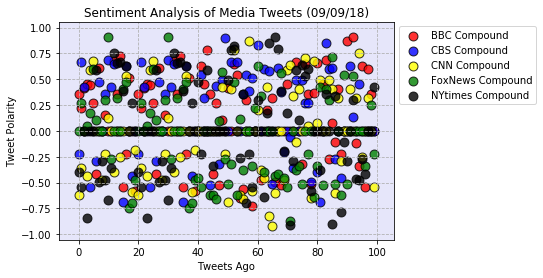

In [42]:
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.set_facecolor('lavender')
BBC = ax.scatter(np.arange(len(Compound_df["BBC Compound"])),
         Compound_df["BBC Compound"], marker="o", color="red", edgecolors="k",
         alpha=0.8, s=80 ) 
CBS = ax.scatter(np.arange(len(Compound_df["BBC Compound"])),
         Compound_df["CBS Compound"], marker="o", color="blue", edgecolors="k",
         alpha=0.8,s=80)
CNN = ax.scatter(np.arange(len(Compound_df["BBC Compound"])),
         Compound_df["CNN Compound"], marker="o", color="yellow", edgecolors="k",
         alpha=0.8 ,s=80)
Fox = ax.scatter(np.arange(len(Compound_df["BBC Compound"])),
         Compound_df["FoxNews Compound"], marker="o", color="green", edgecolors="k",
         alpha=0.8,s=80)
nytimes = ax.scatter(np.arange(len(Compound_df["BBC Compound"])),
         Compound_df["NYtimes Compound"], marker="o", color="black", edgecolors="k",
         alpha=0.8,s=80)
# # Incorporate the other graph properties

plt.title("Sentiment Analysis of Media Tweets (09/09/18)")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid(True, linestyle='dashed')
plt.legend((BBC, CBS, CNN, Fox, nytimes), ("BBC Compound","CBS Compound","CNN Compound","FoxNews Compound","NYtimes Compound"),
           loc='lower left',
           bbox_to_anchor=(1, 0.6))
plt.savefig("Sentiment_Analysis_of_Media_Tweets_09_09_2018")     
plt.show()

# Creating Sentiments Overall Composites

In [43]:
average_BBC = Compound_df["BBC Compound"].mean()
average_CBS = Compound_df["CBS Compound"].mean()
average_CNN = Compound_df["CNN Compound"].mean()
average_Fox = Compound_df["FoxNews Compound"].mean()
average_nytimes = Compound_df["NYtimes Compound"].mean()

averages = {'Compound': pd.Series([average_BBC,average_CBS,average_CNN, average_Fox, average_nytimes],index=['BBC','CBS','CNN','FoxNews','NYtimes'] )}
Compound_mean_df = pd.DataFrame(averages)
Compound_mean_df=Compound_mean_df.reset_index()
Compound_mean_df

,index,Compound
0,BBC,0.132615
1,CBS,0.143713
2,CNN,-0.020907
3,FoxNews,-0.046784
4,NYtimes,0.016688


# Plotting the Sentiments Overview

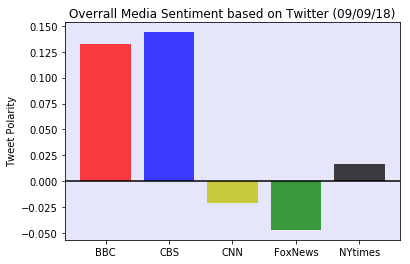

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)
x_axis = np.arange(0, len(Compound_mean_df["index"]))
tick_locations = []
for x in x_axis:
    tick_locations.append(x + 0.4)
ax.bar(x_axis, Compound_mean_df["Compound"], alpha=0.75, color="rbygk", align="edge")    

ax.set_ylabel('Tweet Polarity')
ax.set_title("Overrall Media Sentiment based on Twitter (09/09/18)")
ax.set_facecolor('lavender')
plt.xticks(tick_locations, Compound_mean_df["index"])
plt.axhline(0, color='k')
plt.savefig("Overrall_Media_Sentiment_based_on_Twitter_09_09_2018")
plt.show()